In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

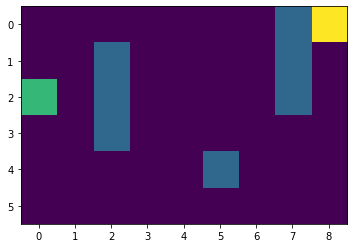

In [2]:

map_size = (6,9)
race_map = np.zeros((map_size[0], map_size[1]))


race_map[1:4,2] = 1
race_map[:3,7] = 1
race_map[-2,5] = 1

race_map[2,0] = 2
race_map[0,-1] = 3


plt.imshow(race_map)

In [192]:
def step(state, action):
        
    next_state =  state.copy()
        
    if action == 0:
        next_state[0] += 1
    elif action == 1:
        next_state[0] -= 1
    elif action == 2:
        next_state[1] += 1
    elif action == 3:
        next_state[1] -= 1
        [-1,0],[+1,0],[0,1],[0,-1]
        [-1,0],[+1,0],[0,1],[0,-1]
        
    next_state[0] = next_state[0] if next_state[0] >= 0 else 0
    next_state[0] = next_state[0] if next_state[0] < map_size[0] else map_size[0]-1
    
    next_state[1] = next_state[1] if next_state[1] >= 0 else 0
    next_state[1] = next_state[1] if next_state[1] < map_size[1] else map_size[1]-1
    
    
    next_state[0] = next_state[0] if race_map[next_state[0],next_state[1]] != 1 else state[0]
    next_state[1] = next_state[1] if race_map[next_state[0],next_state[1]] != 1 else state[1]
            
            
    reward = 0
    reward = 1 if next_state[0] == 0 and next_state[1] == race_map.shape[1]-1 else reward      
    
    return (next_state,reward)

In [202]:


def test_planing(planing_steps = 0,color = "c"):
    Q = np.random.rand(map_size[0],map_size[1],4)/10
    C = np.zeros((map_size[0],map_size[1],4))
    Model = np.zeros((map_size[0],map_size[1],4,3)) # S,A,(S',R)
    
    policy_pi = np.argmax(Q,axis=-1)
    
    time_to_end=[]
    
    episodes = 40
    #planing_steps = 5
    gamma = .9
    alpha = .1

    for episode_idx in tqdm(range(episodes)):

        state = [2,0]

        # Prepare soft policy
        rsh_pi = policy_pi.reshape((map_size[0]*map_size[1]))
        policy_b = np.zeros((rsh_pi.size, 4))
        policy_b[:,:] = .1/3
        policy_b[np.arange(rsh_pi.size),rsh_pi] = .9
        policy_b = policy_b.reshape(Q.shape)

        episode_len = 0
        while True:
            episode_len += 1

            action = np.random.choice(4,p=policy_b[state[0],state[1]])

            state_p, R = step(state, action)

            #action_p = np.random.choice(4,p=policy_b[state_p[0],state_p[1]])

            C[state[0],state[1],action] += 1
            Q[state[0],state[1],action] += alpha * (R + gamma * np.max(Q[state_p[0],state_p[1]]) - Q[state[0],state[1],action])#/C[state[0],state[1],action]

            Model[state[0],state[1],action,0] = state_p[0]
            Model[state[0],state[1],action,1] = state_p[1]
            Model[state[0],state[1],action,2] = R

            policy_pi = np.argmax(Q,axis=-1)

            # Prepare soft policy
            policy_b[state[0],state[1],:] = .1/3
            policy_b[state[0],state[1],policy_pi[state[0],state[1]]] = .9

            action = action_p
            state = state_p

            if state[0] == 0 and state[1] == race_map.shape[1]-1:
                break

        # plot model
        """plt.imshow(race_map)        
        model_visited_sa = np.where(C!=0)
        for p in range(len(model_visited_sa[0])):
            j,i=model_visited_sa[0][p],model_visited_sa[1][p]
            if model_visited_sa[2][p] == 3:
                plt.arrow(i, j, -.3, 0, width = 0.05,color="y")
            if model_visited_sa[2][p] == 2:
                plt.arrow(i, j, .3, 0, width = 0.05,color="y")
            if model_visited_sa[2][p] == 0:
                plt.arrow(i, j, 0, +.3, width = 0.05,color="y")
            if model_visited_sa[2][p] == 1:
                plt.arrow(i, j, 0, -.3, width = 0.05,color="y")
                
        plt.show()"""
        
        #plot optimal policy 
        def plot_Q():
            plt.imshow(race_map)       
            for i in range(Q.shape[0]):
                for j in range(Q.shape[1]):
                    for a in range(Q.shape[2]):
                        #j,i=model_visited_sa[0][p],model_visited_sa[1][p]
                        
                        if Q[i,j,a]==np.max(Q[i,j]):
                            if a == 3:
                                plt.arrow(j, i, -.3, 0, width = 0.05,color="w",alpha=Q[i,j,a]/np.max(Q))
                            if a == 2:
                                plt.arrow(j, i, .3, 0, width = 0.05,color="w",alpha=Q[i,j,a]/np.max(Q))
                            if a == 0:
                                plt.arrow(j, i, 0, +.3, width = 0.05,color="w",alpha=Q[i,j,a]/np.max(Q))
                            if a == 1:
                                plt.arrow(j, i, 0, -.3, width = 0.05,color="w",alpha=Q[i,j,a]/np.max(Q))

            plt.show()
            
        #plot_Q()
        # Planing        
        model_visited_sa = np.where(C!=0)
            
            
            
        for planing_step in range(planing_steps):
            for i in range(len(model_visited_sa[0])):
                random_sa = np.random.choice(np.arange(len(model_visited_sa[0])))
                state = [model_visited_sa[0][random_sa],model_visited_sa[1][random_sa]]
                action = model_visited_sa[2][random_sa]
                state_p = [
                    int(Model[state[0],state[1],action, 0]),
                    int(Model[state[0],state[1],action, 1]),
                ]
                R = Model[state[0],state[1],action, 2]
                
                Q[state[0],state[1],action] +=  alpha * (R + gamma * np.max(Q[state_p[0],state_p[1]]) - Q[state[0],state[1],action])#/C[state[0],state[1],action]
            
        
        time_to_end.append(episode_len)
    
    """mean = []
    ran = []
    window_size = 10
    te = time_to_end[-50000:]
    for i in range(len(te)-window_size):
        mean.append(np.mean(te[i:i+window_size]))
        ran.append(np.mean(np.abs(te[i:i+window_size]-mean[-1])))

    plt.fill_between(np.arange(len(mean)),np.array(mean)+np.array(ran), np.array(mean)-np.array(ran),alpha=0.3,facecolor=color)
    plt.plot(mean,c=color)"""
    plot_Q()
    #plt.plot(time_to_end[1:],c=color)
    plt.show()
    return policy_pi

In [203]:
(6* 9* 4)

216

100%|██████████| 40/40 [00:01<00:00, 36.78it/s]


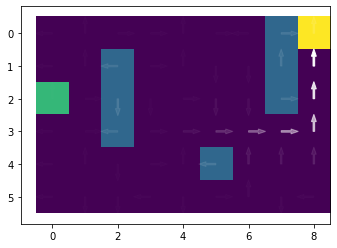

100%|██████████| 40/40 [00:01<00:00, 38.88it/s]


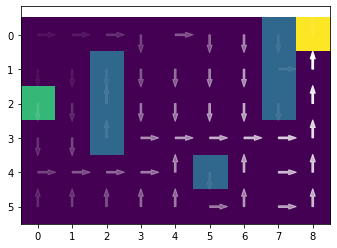

100%|██████████| 40/40 [00:02<00:00, 17.52it/s]


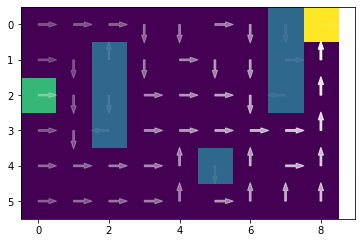

In [204]:
policy_pi = test_planing(planing_steps=0,color="c")
policy_pi = test_planing(planing_steps=2,color="r")
policy_pi = test_planing(planing_steps=10,color="k")


In [169]:
mean = []
ran = []
window_size = 10
te = time_to_end[-50000:]
for i in range(len(te)-window_size):
    mean.append(np.mean(te[i:i+window_size]))
    ran.append(np.mean(np.abs(te[i:i+window_size]-mean[-1])))

plt.fill_between(np.arange(len(mean)),np.array(mean)+np.array(ran), np.array(mean)-np.array(ran),alpha=0.3,facecolor="c")
plt.plot(mean,c="c")

NameError: name 'time_to_end' is not defined

In [175]:
state = [2,0]

# Prepare soft policy
rsh_pi = policy_pi.reshape((map_size[0]*map_size[1] ))
policy_b = np.zeros((rsh_pi.size, 4))
policy_b[:,:] = .1/3
policy_b[np.arange(rsh_pi.size),rsh_pi] = .9
policy_b = policy_b.reshape((6,9,4))
    
action = np.random.choice(4,p=policy_b[state[0],state[1]])
#action = 0 if episode_idx==0 else action
    

states,actions,rewards = [state],[action],[]

episode_len = 0
while True:
    episode_len+=1
    state_p, R = step(state, action)
        
    action_p = np.random.choice(4,p=policy_b[state_p[0],state_p[1]])
    
    action = action_p
    state = state_p
    states.append(state)
    actions.append(action)
    rewards.append(R)
    
    if state[0] == 0 and state[1] == race_map.shape[1]-1:
        break

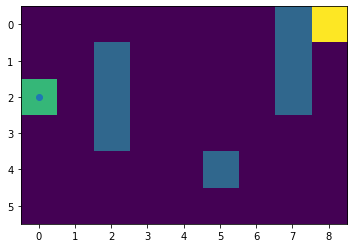

state:[2, 0]
actions:0
 rewards:0


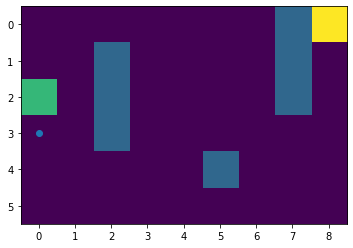

state:[3, 0]
actions:2
 rewards:0


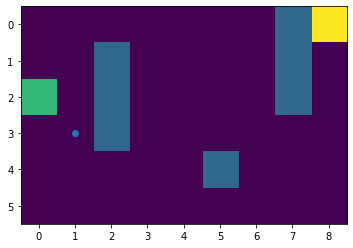

state:[3, 1]
actions:3
 rewards:0


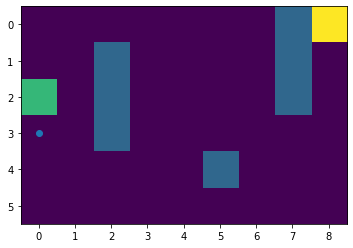

state:[3, 0]
actions:2
 rewards:0


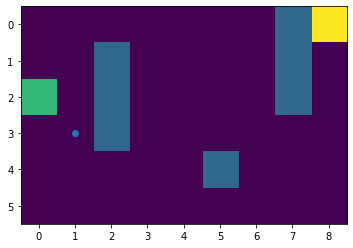

state:[3, 1]
actions:0
 rewards:0


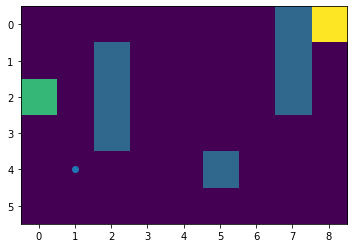

state:[4, 1]
actions:2
 rewards:0


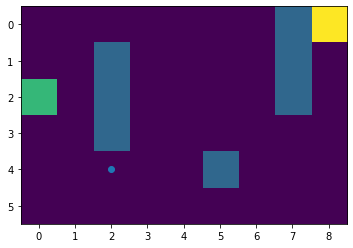

state:[4, 2]
actions:2
 rewards:0


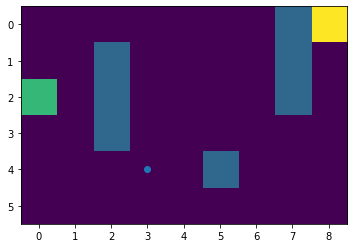

state:[4, 3]
actions:1
 rewards:0


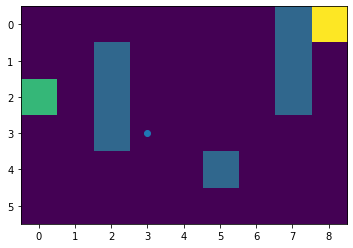

state:[3, 3]
actions:2
 rewards:0


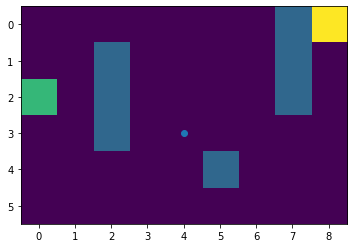

state:[3, 4]
actions:2
 rewards:0


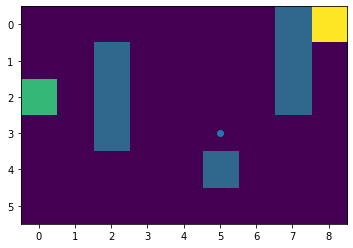

state:[3, 5]
actions:2
 rewards:0


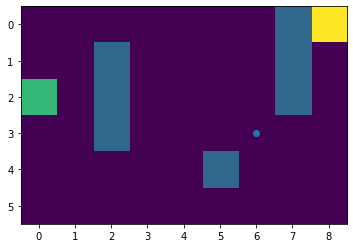

state:[3, 6]
actions:2
 rewards:0


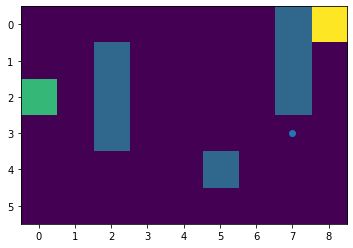

state:[3, 7]
actions:2
 rewards:0


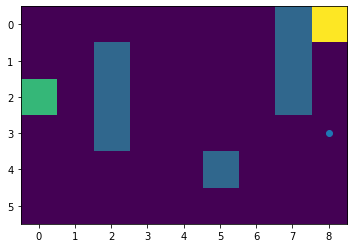

state:[3, 8]
actions:0
 rewards:0


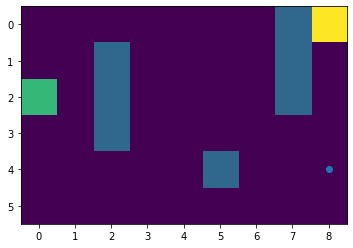

state:[4, 8]
actions:1
 rewards:0


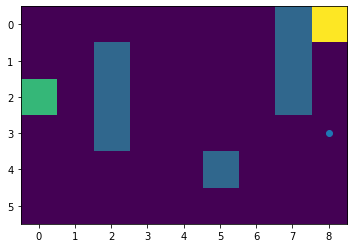

state:[3, 8]
actions:1
 rewards:0


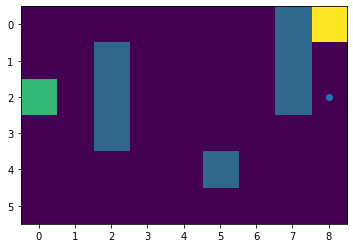

state:[2, 8]
actions:1
 rewards:0


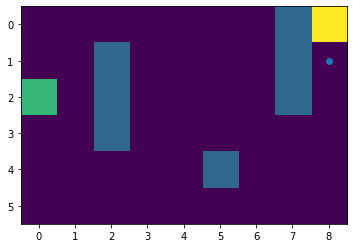

state:[1, 8]
actions:1
 rewards:1


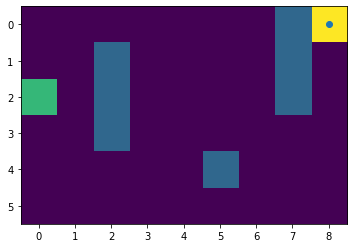

In [176]:
for i,j,k in zip(states,rewards,actions):
    plt.imshow(race_map)
    plt.scatter(i[1],i[0])
    plt.show()
    print(f"state:{i}")
    print(f"actions:{k}\n rewards:{j}")


plt.imshow(race_map)
plt.scatter(states[-1][1],states[-1][0])
plt.show()